# 1. Introduction 

Use this dataset of airline arrival information to predict how late flights
will be. A flight only counts as late if it is more than 30 minutes late.
1. The project should follow guideline as previous projects.
2. Apply models in Naïve Bayes, Logistic Regression, Decision
Tree, Random Forest, Gradient Boosting and SVM.
3. Apply PCA, SelectKBest and RFE for feature selections.
4. Using gridsearchCV to obtain best parameters for models.
5. Compare performances among models, write up analysis
why the model is good or bad in the algorithmic approach
(explain why the algorithm is good or bad for the dataset
structure, can you do something to improve the model?)
6. Include the conclusions.

In [96]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
import time 
import datetime
import seaborn as sns

# 2. Data exporation

In [97]:
# load the data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
data = pd.read_csv("./2008_1mil.csv")
# Choose random 1 mil row
# data = data.sample(n=1000000)
# Export to csv file
# data.to_csv('./2008_1mil.csv')
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,906837,2008,2,27,3,929.00,930,1043.00,1043,DL,1913,N912DE,74.00,73.00,46.00,0.00,-1.00,BOS,LGA,185,3.00,25.00,0,NaN,0,nan,nan,nan,nan,nan
1,6561950,2008,12,23,2,2304.00,2255,2358.00,2352,XE,2057,N16149,54.00,57.00,41.00,6.00,9.00,IAH,CRP,201,4.00,9.00,0,NaN,0,nan,nan,nan,nan,nan
2,1115097,2008,2,23,6,1754.00,1756,2012.00,2048,AS,3,N565AS,318.00,352.00,301.00,-36.00,-2.00,DCA,SEA,2329,7.00,10.00,0,NaN,0,nan,nan,nan,nan,nan
3,5196562,2008,9,22,1,948.00,925,1338.00,1310,MQ,3617,N524AE,170.00,165.00,144.00,28.00,23.00,DFW,ORF,1213,3.00,23.00,0,NaN,0,23.00,0.00,5.00,0.00,0.00
4,5656006,2008,10,1,3,1855.00,1900,1935.00,1955,WN,1549,N782SA,100.00,115.00,84.00,-20.00,-5.00,DEN,PHX,602,5.00,11.00,0,NaN,0,nan,nan,nan,nan,nan


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 30 columns):
Unnamed: 0           1000000 non-null int64
Year                 1000000 non-null int64
Month                1000000 non-null int64
DayofMonth           1000000 non-null int64
DayOfWeek            1000000 non-null int64
DepTime              980526 non-null float64
CRSDepTime           1000000 non-null int64
ArrTime              978313 non-null float64
CRSArrTime           1000000 non-null int64
UniqueCarrier        1000000 non-null object
FlightNum            1000000 non-null int64
TailNum              988099 non-null object
ActualElapsedTime    977872 non-null float64
CRSElapsedTime       999878 non-null float64
AirTime              977872 non-null float64
ArrDelay             977872 non-null float64
DepDelay             980526 non-null float64
Origin               1000000 non-null object
Dest                 1000000 non-null object
Distance             1000000 non-null int6

Outlier Detection and Removal

In [99]:
pd.options.display.float_format = "{:.2f}".format

In [100]:
data.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,980526.00,1000000.00,978313.00,1000000.00,1000000.00,977872.00,999878.00,977872.00,977872.00,980526.00,1000000.00,978313.00,980433.00,1000000.00,1000000.00,217955.00,217955.00,217955.00,217955.00,217955.00
mean,3501010.46,2008.00,6.37,15.72,3.93,1334.18,1326.56,1481.27,1495.38,2221.31,127.38,128.91,104.09,8.23,10.02,726.82,6.85,16.45,0.02,0.00,15.74,3.05,17.19,0.07,20.84
std,2022851.68,0.00,3.41,8.80,1.99,478.15,464.14,505.73,482.71,1962.64,70.31,69.51,67.57,38.62,35.51,563.05,4.90,11.29,0.14,0.05,40.43,19.31,32.02,1.80,39.44
min,0.00,2008.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,15.00,-140.00,0.00,-73.00,-67.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1748530.50,2008.00,3.00,8.00,2.00,928.00,926.00,1107.00,1115.00,621.00,77.00,80.00,56.00,-10.00,-4.00,325.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3498679.50,2008.00,6.00,16.00,4.00,1326.00,1320.00,1512.00,1518.00,1568.00,110.00,110.00,86.00,-2.00,-1.00,581.00,6.00,14.00,0.00,0.00,0.00,0.00,6.00,0.00,0.00
75%,5252372.25,2008.00,9.00,23.00,6.00,1728.00,1715.00,1909.00,1907.00,3511.00,157.00,159.00,132.00,12.00,8.00,954.00,8.00,19.00,0.00,0.00,16.00,0.00,21.00,0.00,26.00
max,7009723.00,2008.00,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,9741.00,790.00,660.00,664.00,1951.00,1952.00,4962.00,179.00,393.00,1.00,1.00,1951.00,1225.00,896.00,216.00,1303.00


Year is always 2008, we can drop Year column. 

In [101]:
data.drop(columns = 'Year', inplace=True)
data.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,906837,2,27,3,929.00,930,1043.00,1043,DL,1913,N912DE,74.00,73.00,46.00,0.00,-1.00,BOS,LGA,185,3.00,25.00,0,NaN,0,nan,nan,nan,nan,nan
1,6561950,12,23,2,2304.00,2255,2358.00,2352,XE,2057,N16149,54.00,57.00,41.00,6.00,9.00,IAH,CRP,201,4.00,9.00,0,NaN,0,nan,nan,nan,nan,nan
2,1115097,2,23,6,1754.00,1756,2012.00,2048,AS,3,N565AS,318.00,352.00,301.00,-36.00,-2.00,DCA,SEA,2329,7.00,10.00,0,NaN,0,nan,nan,nan,nan,nan
3,5196562,9,22,1,948.00,925,1338.00,1310,MQ,3617,N524AE,170.00,165.00,144.00,28.00,23.00,DFW,ORF,1213,3.00,23.00,0,NaN,0,23.00,0.00,5.00,0.00,0.00
4,5656006,10,1,3,1855.00,1900,1935.00,1955,WN,1549,N782SA,100.00,115.00,84.00,-20.00,-5.00,DEN,PHX,602,5.00,11.00,0,NaN,0,nan,nan,nan,nan,nan


In [102]:
# Dữ liệu dạng object 
data.describe(include='O')

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
count,1000000,988099,1000000,1000000,19622
unique,20,5338,303,302,4
top,WN,N476HA,ATL,ATL,B
freq,171576,661,58810,58922,7924


Now the remained Numeric features are used IQR to check the outliers.

In [103]:
# dataNumeric = data.select_dtypes(include=np.number)
# # Drop FlightNum, it dont have outlier
# dataNumeric.drop(columns = 'FlightNum', inplace=True)

# # get quartile 1st and 3rd
# Q1, Q3 = dataNumeric.quantile(0.25), dataNumeric.quantile(0.75) 
# IQR = Q3 - Q1
# # Boundary
# cutOff = 3*IQR
# # Setup Boudnary
# lower, upper = Q1 - cutOff, Q3 + cutOff # identify Outliers
# for i in dataNumeric:
#     print(dataNumeric[i][(dataNumeric[i] < lower[i]) | (dataNumeric[i] > upper[i])].value_counts().sort_index())
#     print('Total Outliers for ' + i + ' is ' , dataNumeric[i][(dataNumeric[i] < lower[i]) | (dataNumeric[i] > upper[i])].value_counts().sum())
#     print('--------------------------------------------------------------\n')

Check and Fill Missing Value

In [104]:
# Number of missing values in each column
missingValueColumns = (data.isnull().sum())
# Find missing column in data
missingValueColumnsFrame = missingValueColumns[missingValueColumns > 0].to_frame()
# Rename to 0 to Count missingValueColumnsFrame=missingValueColumnsFrame.rename(columns={0:'Count'})
# add percentage column
missingValueColumnsFrame['Percentage'] = missingValueColumnsFrame/data.shape[0] * 100
missingValueColumnsFrame

,0,Percentage
DepTime,19474,1.95
ArrTime,21687,2.17
TailNum,11901,1.19
ActualElapsedTime,22128,2.21
CRSElapsedTime,122,0.01
AirTime,22128,2.21
ArrDelay,22128,2.21
DepDelay,19474,1.95
TaxiIn,21687,2.17
TaxiOut,19567,1.96


In [105]:
# data['CancellationCode'].fillna('0', inplace = True)
# data['CarrierDelay'].fillna(0, inplace = True)

# data['WeatherDelay'].fillna(0, inplace = True)
# data['NASDelay'].fillna(0, inplace = True)
# data['SecurityDelay'].fillna(0, inplace = True)
# data['LateAircraftDelay'].fillna(0, inplace = True)
data.drop(columns=['CancellationCode','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], inplace= True)

In [106]:
data.dropna(inplace = True)
data.isnull().sum()

Unnamed: 0           0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
dtype: int64

In [107]:
def transformAttrition(value):
    if (value >= 30):
        return 1
    return 0
        
data['LateArr'] = data['ArrDelay'].apply(lambda x: transformAttrition(x))
data.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,LateArr
0,906837,2,27,3,929.00,930,1043.00,1043,DL,1913,N912DE,74.00,73.00,46.00,0.00,-1.00,BOS,LGA,185,3.00,25.00,0,0,0
1,6561950,12,23,2,2304.00,2255,2358.00,2352,XE,2057,N16149,54.00,57.00,41.00,6.00,9.00,IAH,CRP,201,4.00,9.00,0,0,0
2,1115097,2,23,6,1754.00,1756,2012.00,2048,AS,3,N565AS,318.00,352.00,301.00,-36.00,-2.00,DCA,SEA,2329,7.00,10.00,0,0,0
3,5196562,9,22,1,948.00,925,1338.00,1310,MQ,3617,N524AE,170.00,165.00,144.00,28.00,23.00,DFW,ORF,1213,3.00,23.00,0,0,0
4,5656006,10,1,3,1855.00,1900,1935.00,1955,WN,1549,N782SA,100.00,115.00,84.00,-20.00,-5.00,DEN,PHX,602,5.00,11.00,0,0,0


# Count late and no late

Text(0, 0.5, 'Frequency')

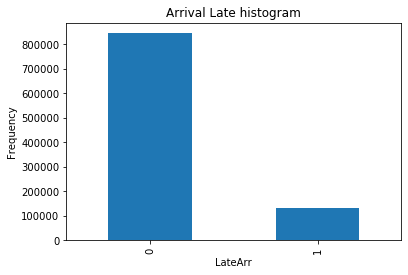

In [108]:
count_LateArr = pd.value_counts(data['LateArr'], sort = True).sort_index()
count_LateArr.plot(kind = 'bar')
plt.title("Arrival Late histogram")
plt.xlabel("LateArr")
plt.ylabel("Frequency")

In [109]:
# Data exploration 

In [110]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = data['ArrDelay'].groupby(data['UniqueCarrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
UniqueCarrier,,,,
AQ,-53.00,242.00,1161.00,-2.94
HA,-71.00,855.00,8730.00,0.96
F9,-67.00,512.00,13637.00,6.44
AS,-60.00,586.00,21271.00,4.56
OH,-70.00,670.00,27370.00,11.94
B6,-73.00,591.00,27479.00,11.08
YV,-71.00,518.00,35038.00,11.64
9E,-59.00,1094.00,36182.00,4.41
FL,-69.00,1175.00,36770.00,9.18


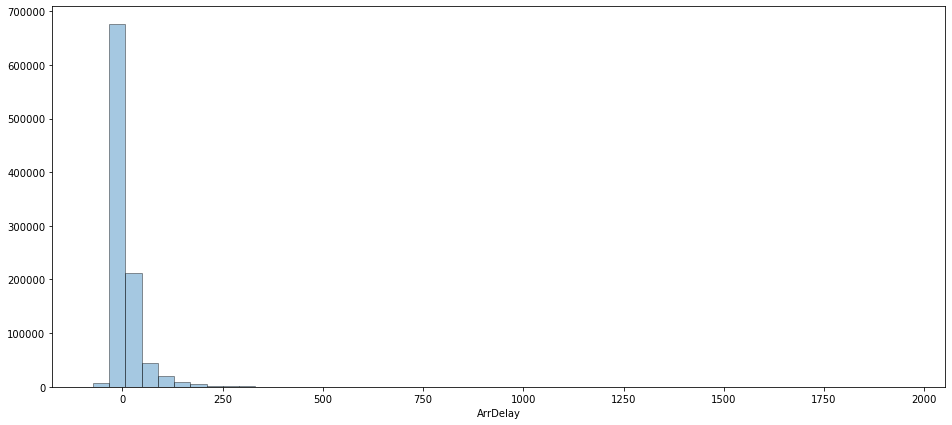

In [111]:
plt.figure(figsize=(16,7))
#plt.xlim(-100,100)
sns.distplot(data['ArrDelay'], kde = False,hist_kws=dict(edgecolor="k"))


In [112]:
# numerical = data.select_dtypes(include = [np.number])

# %config InlineBackend.figure_format = 'png'
# #Plot numerical data against ArrDelay
# fig, axes = plt.subplots(8, 3, figsize=(12, 24))

# for idx, feat in enumerate(numerical.columns.difference(['ArrDelay'])):
#     ax = axes[int(idx / 3), idx%3]
#     sns.scatterplot(x=feat, y='ArrDelay', data=numerical, ax=ax);
#     ax.set_xlabel(feat)
#     ax.set_ylabel('ArrDelay')
    
# fig.tight_layout();

Text(0.5, 1, 'Variable Correlation')

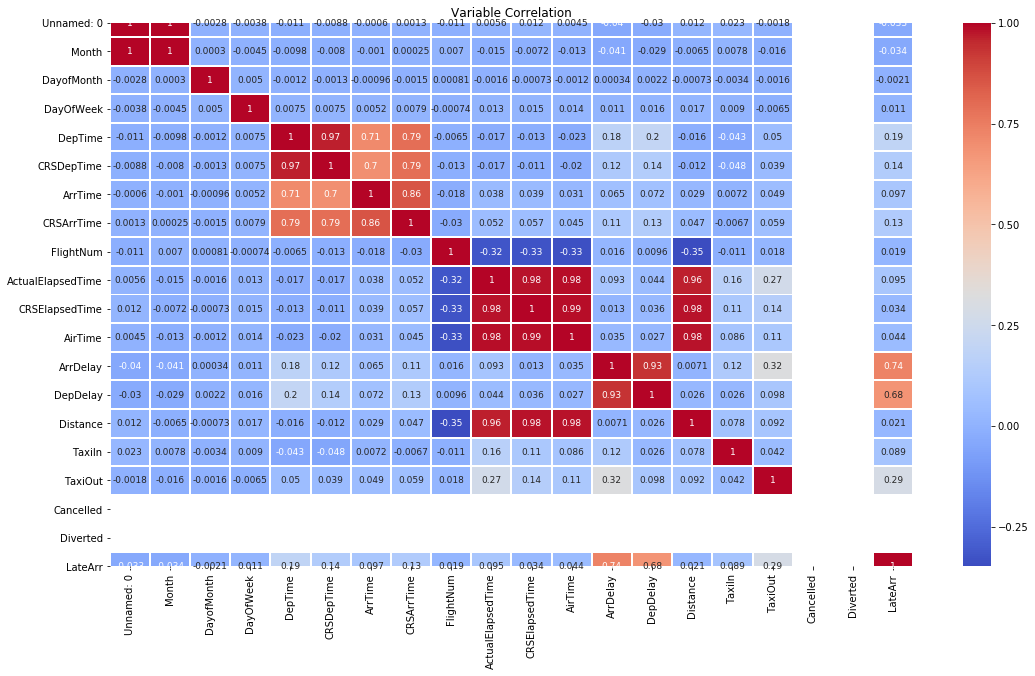

In [113]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Base on above Correlation, I will drop columns that have very high Correlation

In [114]:
data.drop(columns=['CRSDepTime','CRSArrTime','CRSElapsedTime','ActualElapsedTime'], inplace= True)
data.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,LateArr
0,906837,2,27,3,929.00,1043.00,DL,1913,N912DE,46.00,0.00,-1.00,BOS,LGA,185,3.00,25.00,0,0,0
1,6561950,12,23,2,2304.00,2358.00,XE,2057,N16149,41.00,6.00,9.00,IAH,CRP,201,4.00,9.00,0,0,0
2,1115097,2,23,6,1754.00,2012.00,AS,3,N565AS,301.00,-36.00,-2.00,DCA,SEA,2329,7.00,10.00,0,0,0
3,5196562,9,22,1,948.00,1338.00,MQ,3617,N524AE,144.00,28.00,23.00,DFW,ORF,1213,3.00,23.00,0,0,0
4,5656006,10,1,3,1855.00,1935.00,WN,1549,N782SA,84.00,-20.00,-5.00,DEN,PHX,602,5.00,11.00,0,0,0


In [115]:
dataLateArr = data[ data['LateArr']==1]
dataNotLateArr = data[ data['LateArr']==0]
dataLateArr.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,LateArr
5,3598208,6,15,7,1828.00,2306.00,DL,137,N648DL,332.00,70.00,-2.00,JFK,LAX,2475,15.00,111.00,0,0,1
7,4993789,9,30,2,1430.00,1638.00,OH,6756,N962CA,83.00,47.00,30.00,LGA,GSO,461,5.00,40.00,0,0,1
18,5577161,10,29,3,1037.00,1144.00,OO,6601,N715SK,112.00,56.00,73.00,MSN,DEN,826,8.00,7.00,0,0,1
22,326448,1,31,4,1813.00,2159.00,EV,4270,N885AS,119.00,76.00,38.00,OKC,ATL,761,20.00,27.00,0,0,1
31,6497780,12,13,6,1038.00,1129.00,WN,173,N639SW,36.00,39.00,38.00,DAL,OKC,181,4.00,11.00,0,0,1


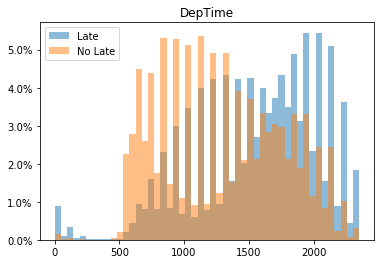

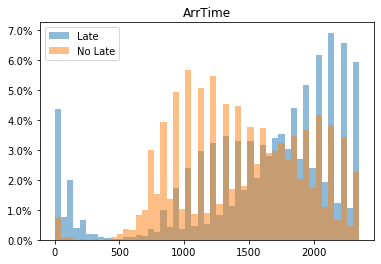

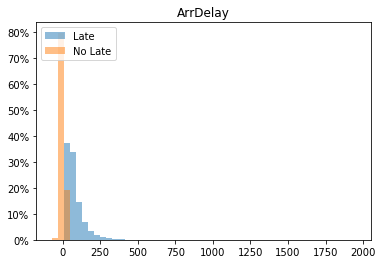

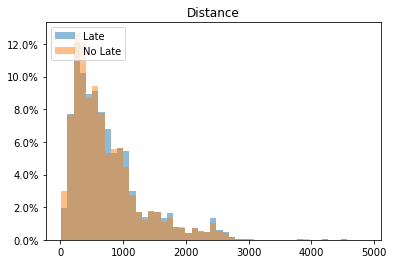

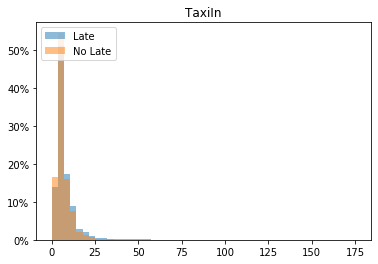

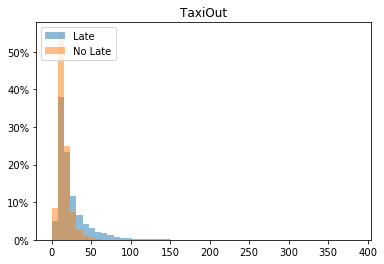

In [116]:
from matplotlib.ticker import PercentFormatter
columns = ['DepTime', 'ArrTime', 'ArrDelay', 'Distance', 'TaxiIn', 'TaxiOut']
for column in columns:
    bins = np.arange(start=data[column].min(), stop=data[column].max(), step=(data[column].max()-data[column].min())/50)
    plt.hist(dataLateArr[column], alpha=0.5, label='Late', bins=bins, weights = np.ones(len(dataLateArr[column])) / len(dataLateArr[column]))
    plt.hist(dataNotLateArr[column], alpha=0.5, label='No Late', bins=bins, weights = np.ones(len(dataNotLateArr[column])) / len(dataNotLateArr[column]))
    plt.legend(loc='upper left')
    plt.title(column)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.show()

Base on above graphs, there are nearly equal in TaxiIn, Distance feature. We will select DepTime, ArrTime, TaxiOut for classification.

Category data

In [117]:
# Dữ liệu dạng object 
data[[ 'Month','DayofMonth', 'DayOfWeek', 'FlightNum', 'Cancelled', 'Diverted']]=data[['Month','DayofMonth', 'DayOfWeek', 'FlightNum', 'Cancelled', 'Diverted']].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977872 entries, 0 to 999999
Data columns (total 20 columns):
Unnamed: 0       977872 non-null int64
Month            977872 non-null category
DayofMonth       977872 non-null category
DayOfWeek        977872 non-null category
DepTime          977872 non-null float64
ArrTime          977872 non-null float64
UniqueCarrier    977872 non-null object
FlightNum        977872 non-null category
TailNum          977872 non-null object
AirTime          977872 non-null float64
ArrDelay         977872 non-null float64
DepDelay         977872 non-null float64
Origin           977872 non-null object
Dest             977872 non-null object
Distance         977872 non-null int64
TaxiIn           977872 non-null float64
TaxiOut          977872 non-null float64
Cancelled        977872 non-null category
Diverted         977872 non-null category
LateArr          977872 non-null int64
dtypes: category(6), float64(7), int64(3), object(4)
memory usage: 158.8+

In [118]:
def CategoricalPlot(target,feature,data,label=None,legend=None,title=None,percentagePrint=False): 
    '''target: Name of target (str)
    feature: Name of feature (str) data: dataFrame
    lable: lables for (x,y) legend: list for two line title: title of line'''
    FeatureCount = data.groupby(target)[feature].value_counts().sort_index() 
    FeatureCountNo = FeatureCount[0]/data[target].value_counts()[0]*100
    FeatureCountYes = FeatureCount[1]/data[target].value_counts()[1]*100
    if(percentagePrint):
        print('Non-delay: ',FeatureCountNo , '%' ) 
        print('Delay: ',FeatureCountYes , '%' )
    plt.figure(figsize=(8,6)) # figure size 
    plt.plot(FeatureCountNo,  label=legend[0]) 
    plt.plot(FeatureCountYes,  label=legend[1]) 
    plt.xlabel(label[0],fontsize=10)
    plt.xticks(fontsize=10) ## Major tick lable size 
    plt.ylabel('Percentage(%)',fontsize=10) 
    plt.yticks(fontsize=10) ## Major tick lable size 
    plt.title(title + ' in '+ target,fontsize=10) 
    plt.legend(loc='upper right',fontsize=10)
    plt.show()

In [119]:
data.drop(columns=['TailNum','FlightNum'], inplace= True)

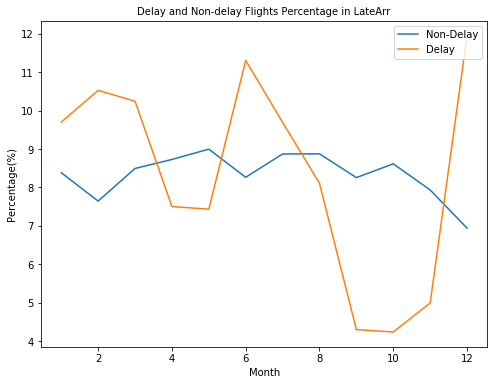

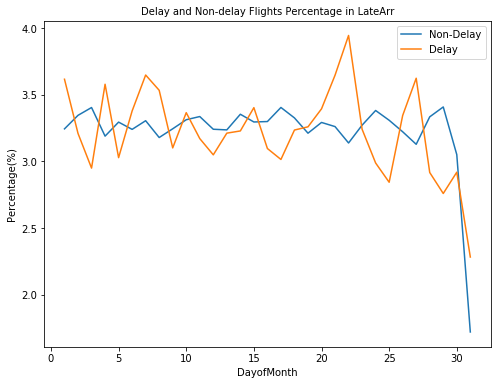

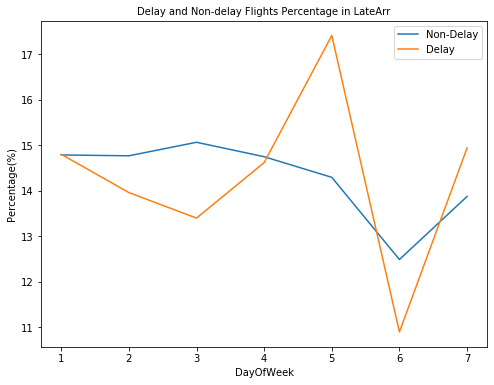

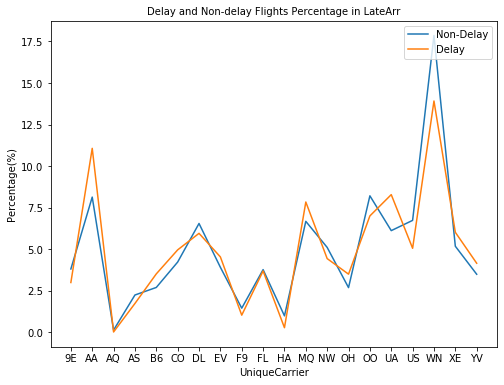

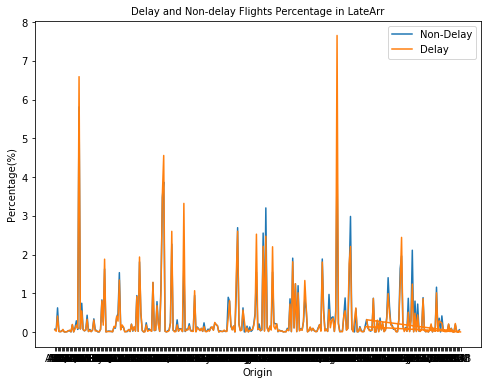

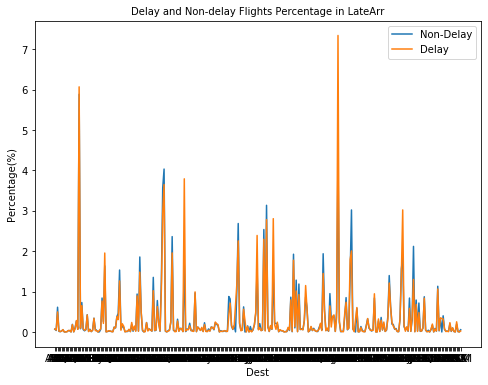

In [120]:
CategoricalPlot(target='LateArr',feature='Month',data=data,label = ['Month'], legend=['Non-Delay','Delay'],title='Delay and Non-delay Flights Percentage')
CategoricalPlot(target='LateArr',feature='DayofMonth',data=data,label = ['DayofMonth'], legend=['Non-Delay','Delay'],title='Delay and Non-delay Flights Percentage')
CategoricalPlot(target='LateArr',feature='DayOfWeek',data=data,label = ['DayOfWeek'], legend=['Non-Delay','Delay'],title='Delay and Non-delay Flights Percentage')
CategoricalPlot(target='LateArr',feature='UniqueCarrier',data=data,label = ['UniqueCarrier'], legend=['Non-Delay','Delay'],title='Delay and Non-delay Flights Percentage')
CategoricalPlot(target='LateArr',feature='Origin',data=data,label = ['Origin'], legend=['Non-Delay','Delay'],title='Delay and Non-delay Flights Percentage')
CategoricalPlot(target='LateArr',feature='Dest',data=data,label = ['Dest'], legend=['Non-Delay','Delay'],title='Delay and Non-delay Flights Percentage')

In [121]:
data.head() 

,Unnamed: 0,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,LateArr
0,906837,2,27,3,929.00,1043.00,DL,46.00,0.00,-1.00,BOS,LGA,185,3.00,25.00,0,0,0
1,6561950,12,23,2,2304.00,2358.00,XE,41.00,6.00,9.00,IAH,CRP,201,4.00,9.00,0,0,0
2,1115097,2,23,6,1754.00,2012.00,AS,301.00,-36.00,-2.00,DCA,SEA,2329,7.00,10.00,0,0,0
3,5196562,9,22,1,948.00,1338.00,MQ,144.00,28.00,23.00,DFW,ORF,1213,3.00,23.00,0,0,0
4,5656006,10,1,3,1855.00,1935.00,WN,84.00,-20.00,-5.00,DEN,PHX,602,5.00,11.00,0,0,0


Base on above graphs, I will choose Month, DayofMonth, DayofWeek for classification. 

# 3. Feature selection

In [122]:
categorical = data.select_dtypes(exclude = [np.number]) 
numerical = data.select_dtypes(include = [np.number])

In [123]:
selectedFeature = ['Month', 'DayofMonth','DayOfWeek', 'DepTime', 'ArrTime', 'TaxiOut']
dataSelected = pd.DataFrame()
dataSelected = numerical[selectedFeature[3:]].copy()
dataSelected = pd.concat([dataSelected,categorical[selectedFeature[:3]]],axis=1) 
dataSelected.head()

,DepTime,ArrTime,TaxiOut,Month,DayofMonth,DayOfWeek
0,929.00,1043.00,25.00,2,27,3
1,2304.00,2358.00,9.00,12,23,2
2,1754.00,2012.00,10.00,2,23,6
3,948.00,1338.00,23.00,9,22,1
4,1855.00,1935.00,11.00,10,1,3


In [124]:
categorical = dataSelected[selectedFeature[:3]].copy()
numerical = dataSelected[selectedFeature[3:]].copy()

categorical_OneHot = pd.DataFrame() 
for i in categorical:

    categorical_OneHot = pd.concat( [categorical_OneHot, pd.get_dummies(categorical[i], drop_first= True, prefix=i)], axis=1)
categorical_OneHot.head()

,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayofMonth_2,DayofMonth_3,DayofMonth_4,DayofMonth_5,DayofMonth_6,DayofMonth_7,DayofMonth_8,DayofMonth_9,DayofMonth_10,DayofMonth_11,DayofMonth_12,DayofMonth_13,DayofMonth_14,DayofMonth_15,DayofMonth_16,DayofMonth_17,DayofMonth_18,DayofMonth_19,DayofMonth_20,DayofMonth_21,DayofMonth_22,DayofMonth_23,DayofMonth_24,DayofMonth_25,DayofMonth_26,DayofMonth_27,DayofMonth_28,DayofMonth_29,DayofMonth_30,DayofMonth_31,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [125]:
data_withOneHot = pd.DataFrame()
data_withOneHot = numerical.copy()
data_withOneHot = pd.concat([data_withOneHot,categorical_OneHot],axis=1) 


In [126]:
data_withOneHot.shape

(977872, 50)

# Scaling feature

In [127]:

mm_scaler = preprocessing.MinMaxScaler(feature_range=(0.01, 0.99)) 
X_OneHotMinMax = pd.DataFrame(mm_scaler.fit_transform(data_withOneHot)) 
X_OneHotMinMax.columns = data_withOneHot.columns
X_OneHotMinMax.describe()

,DepTime,ArrTime,TaxiOut,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayofMonth_2,DayofMonth_3,DayofMonth_4,DayofMonth_5,DayofMonth_6,DayofMonth_7,DayofMonth_8,DayofMonth_9,DayofMonth_10,DayofMonth_11,DayofMonth_12,DayofMonth_13,DayofMonth_14,DayofMonth_15,DayofMonth_16,DayofMonth_17,DayofMonth_18,DayofMonth_19,DayofMonth_20,DayofMonth_21,DayofMonth_22,DayofMonth_23,DayofMonth_24,DayofMonth_25,DayofMonth_26,DayofMonth_27,DayofMonth_28,DayofMonth_29,DayofMonth_30,DayofMonth_31,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
count,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00,977872.00
mean,0.55,0.61,0.05,0.09,0.10,0.09,0.10,0.10,0.10,0.10,0.09,0.09,0.08,0.08,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.15,0.16,0.15,0.15,0.13,0.15
std,0.20,0.21,0.03,0.27,0.28,0.27,0.28,0.28,0.28,0.28,0.26,0.27,0.26,0.26,0.18,0.18,0.17,0.17,0.17,0.18,0.17,0.17,0.18,0.18,0.17,0.17,0.18,0.18,0.17,0.18,0.18,0.17,0.18,0.18,0.17,0.17,0.18,0.17,0.17,0.17,0.17,0.18,0.17,0.13,0.35,0.35,0.35,0.35,0.32,0.34
min,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
25%,0.39,0.46,0.03,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
50%,0.55,0.63,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
75%,0.72,0.79,0.06,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
max,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99


## Create test data 

In [128]:
from sklearn.model_selection import train_test_split

y = data['LateArr']
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X_OneHotMinMax, y, test_size = 0.2, random_state = 10)
X_train_lg.head()

,DepTime,ArrTime,TaxiOut,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayofMonth_2,DayofMonth_3,DayofMonth_4,DayofMonth_5,DayofMonth_6,DayofMonth_7,DayofMonth_8,DayofMonth_9,DayofMonth_10,DayofMonth_11,DayofMonth_12,DayofMonth_13,DayofMonth_14,DayofMonth_15,DayofMonth_16,DayofMonth_17,DayofMonth_18,DayofMonth_19,DayofMonth_20,DayofMonth_21,DayofMonth_22,DayofMonth_23,DayofMonth_24,DayofMonth_25,DayofMonth_26,DayofMonth_27,DayofMonth_28,DayofMonth_29,DayofMonth_30,DayofMonth_31,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
707145,0.43,0.48,0.03,0.01,0.01,0.01,0.01,0.99,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.99
547680,0.63,0.68,0.03,0.01,0.01,0.01,0.01,0.01,0.99,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.99,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.99,0.01,0.01,0.01
92296,0.43,0.52,0.04,0.01,0.01,0.01,0.01,0.99,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.99,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.99
441274,0.47,0.56,0.03,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.99,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.99,0.01,0.01,0.01,0.01,0.01,0.01,0.99,0.01,0.01,0.01,0.01,0.01
703499,0.76,0.88,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.99,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.99,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.99,0.01,0.01,0.01,0.01,0.01


## Convert categorical using label encoding 


In [129]:
dataSelected.describe() 

,DepTime,ArrTime,TaxiOut
count,977872.00,977872.00,977872.00
mean,1334.14,1481.30,16.44
std,478.13,505.63,11.28
min,1.00,1.00,0.00
25%,928.00,1107.00,10.00
50%,1326.00,1512.00,14.00
75%,1728.00,1909.00,19.00
max,2400.00,2400.00,393.00


### DepTime
Categorize DepTime from 1h -> 24h

### ArrTime
Categorize ArrTime from 1h -> 24h

### TaxiOut
- U30: ( min < 30)
- U1: ( 30 < min < 60)
- O1: ( min >= 60)

In [130]:
def convertTime2Category(hour):
    roundHour = round(hour/100)
    if (roundHour > 24):
        return '24'
    return str(roundHour)

def convertTaxiOut(minutes):
    if (minutes < 30) :
        return 'U30'
    elif ((minutes >= 30) and (minutes < 60)):
        return 'U1'
    elif (minutes >= 60):
        return 'O1' 
    else:
        return -1

In [131]:
dataSelected.describe()

,DepTime,ArrTime,TaxiOut
count,977872.00,977872.00,977872.00
mean,1334.14,1481.30,16.44
std,478.13,505.63,11.28
min,1.00,1.00,0.00
25%,928.00,1107.00,10.00
50%,1326.00,1512.00,14.00
75%,1728.00,1909.00,19.00
max,2400.00,2400.00,393.00


In [132]:
LabelEncodedataSelected = dataSelected.copy()
LabelEncodedataSelected['DepTime'] = LabelEncodedataSelected['DepTime'].apply(convertTime2Category)
LabelEncodedataSelected['ArrTime'] = LabelEncodedataSelected['ArrTime'].apply(convertTime2Category)
LabelEncodedataSelected['TaxiOut'] = LabelEncodedataSelected['TaxiOut'].apply(convertTaxiOut)

In [133]:
print(LabelEncodedataSelected['DepTime'].value_counts()) 
print(LabelEncodedataSelected['ArrTime'].value_counts()) 
print(LabelEncodedataSelected['TaxiOut'].value_counts()) 

8     65196
6     65090
7     63621
10    63102
11    62201
16    62066
13    61769
12    61647
9     61129
17    60737
14    59228
18    58240
15    57883
19    55696
20    43707
21    38290
22    19679
23     7027
5      6036
0      2567
24     1268
1      1078
2       324
4       169
3       122
Name: DepTime, dtype: int64
16    65153
12    63949
18    63687
10    63565
20    62721
14    62154
17    59939
15    57753
19    57714
11    57670
13    56871
9     54477
21    53255
22    49122
8     47791
23    34936
7     29091
0     12255
6      9040
1      4892
24     4709
5      4120
2      1638
4       789
3       581
Name: ArrTime, dtype: int64
U30    900044
U1      67526
O1      10302
Name: TaxiOut, dtype: int64


In [134]:
label_encoder = preprocessing.LabelEncoder()
LabelEncodedataSelected['DepTime'] = label_encoder.fit_transform(LabelEncodedataSelected['DepTime'])
LabelEncodedataSelected['ArrTime'] = label_encoder.fit_transform(LabelEncodedataSelected['ArrTime'])
LabelEncodedataSelected['TaxiOut'] = label_encoder.fit_transform(LabelEncodedataSelected['TaxiOut'])


In [135]:
X_train, X_test, y_train, y_test = train_test_split(LabelEncodedataSelected, y, test_size = 0.2, random_state = 10)

In [136]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782297 entries, 723127 to 353186
Data columns (total 6 columns):
DepTime       782297 non-null int64
ArrTime       782297 non-null int64
TaxiOut       782297 non-null int64
Month         782297 non-null category
DayofMonth    782297 non-null category
DayOfWeek     782297 non-null category
dtypes: category(3), int64(3)
memory usage: 26.1 MB


In [137]:
X_train.describe()

,DepTime,ArrTime,TaxiOut
count,782297.00,782297.00,782297.00
mean,11.53,10.49,1.91
std,7.38,6.60,0.32
min,0.00,0.00,0.00
25%,5.00,5.00,2.00
50%,9.00,9.00,2.00
75%,21.00,14.00,2.00
max,24.00,24.00,2.00


# 4. Apply Model in Logistic Regression, Naïve Bayes, Decision Tree, Random Forest, Gradient Boosting for Prediction

In [138]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [139]:
def confusion_matrix(y_test, y_pred, title = 'Confusion matrix'):
    cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title=title)
    plt.show()

# Naive Bayes 


In [140]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
print(clf.fit(X_train, y_train))
GaussianNB(priors=None, var_smoothing=1e-09)
nb_y_pred = clf.predict(X_test)

GaussianNB(priors=None, var_smoothing=1e-09)


              precision    recall  f1-score   support

           0       0.89      0.95      0.92    169167
           1       0.42      0.24      0.31     26408

    accuracy                           0.85    195575
   macro avg       0.65      0.60      0.61    195575
weighted avg       0.83      0.85      0.83    195575



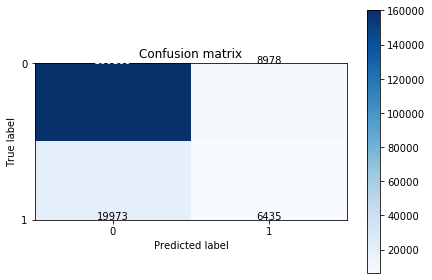

In [141]:
from sklearn.metrics import classification_report

print(classification_report(y_test, nb_y_pred))
confusion_matrix(y_test, nb_y_pred)

## Metrics

- Accuracy = (TP+TN)/total
- Precision = TP/(TP+FP)
- Recall = TP/(TP+FN)

accuracy_score: Tỉ lệ giữa số điểm được dự đoán đúng / Tổng số điểm tập test 

Precision: được định nghĩa là tỉ lệ số điểm true positive trong số những điểm được phân loại là positive

Recall được định nghĩa là tỉ lệ số điểm true positive trong số những điểm thực sự là positive

https://machinelearningcoban.com/2017/08/31/evaluation/#-accuracy

In [142]:
# naive_bayes_recall = metrics.recall_score(y_test_label_encoder, y_pred)
# print('accuracy score',  metrics.accuracy_score(y_test_label_encoder, y_pred))
# print('Precision score', metrics.precision_score(y_test_label_encoder, y_pred))
# print('recall score', naive_bayes_recall)

# Logistic Regression 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    169167
           1       0.70      0.13      0.22     26408

    accuracy                           0.88    195575
   macro avg       0.79      0.56      0.58    195575
weighted avg       0.86      0.88      0.84    195575



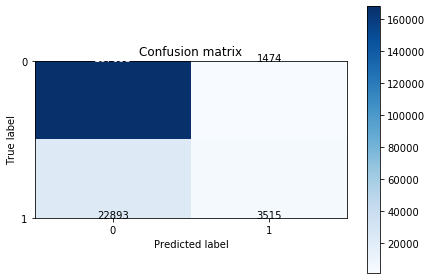

In [172]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
print(model.fit(X_train_lg, y_train_lg))
lg_y_pred = model.predict(X_test_lg)
print(classification_report(y_test, lg_y_pred))
confusion_matrix(y_test_lg, lg_y_pred)

# Random Forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.89      0.97      0.93    169167
           1       0.58      0.22      0.32     26408

    accuracy                           0.87    195575
   macro avg       0.73      0.60      0.63    195575
weighted avg       0.85      0.87      0.85    195575



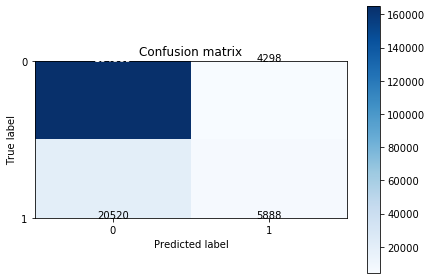

In [144]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50)
print(rf_model.fit(X_train, y_train))
rf_y_pred = rf_model.predict(X_test)

print(classification_report(y_test, rf_y_pred))
# print('accuracy score',  metrics.accuracy_score(y_test, rf_y_pred))
# print('Precision score', metrics.precision_score(y_test, rf_y_pred))
# print('recall score', metrics.recall_score(y_test, rf_y_pred))
# Compute confusion matrix
confusion_matrix(y_test,rf_y_pred)

# Gradient Boosting

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    169167
           1       0.76      0.15      0.24     26408

    accuracy                           0.88    195575
   macro avg       0.82      0.57      0.59    195575
weighted avg       0.87      0.88      0.84    19557

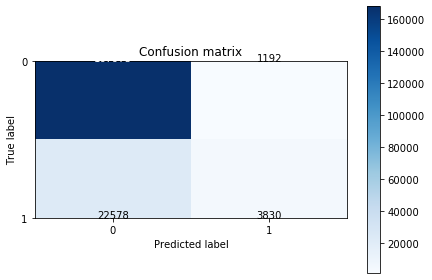

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
print(gb_model.fit(X_train, y_train))
gb_y_pred = gb_model.predict(X_test)

print(classification_report(y_test, gb_y_pred))
# print('accuracy score',  metrics.accuracy_score(y_test, rf_y_pred))
# print('Precision score', metrics.precision_score(y_test, rf_y_pred))
# print('recall score', metrics.recall_score(y_test, rf_y_pred))
# Compute confusion matrix
confusion_matrix(y_test, gb_y_pred)

## Decision tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.89      0.98      0.93    169167
           1       0.58      0.20      0.30     26408

    accuracy                           0.87    195575
   macro avg       0.73      0.59      0.61    195575
weighted avg       0.85      0.87      0.84    195575



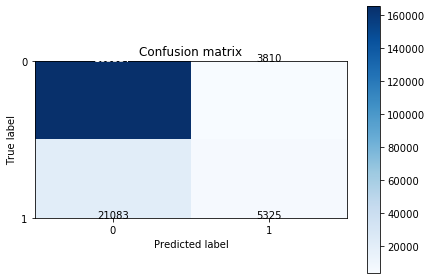

In [146]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
print(dt_model.fit(X_train, y_train))
dt_y_pred = dt_model.predict(X_test)
print(classification_report(y_test, dt_y_pred))
confusion_matrix(y_test, dt_y_pred)

## SVM

In [147]:
# from sklearn.svm import SVC
# svm_model = SVC(gamma='auto')
# print(svm_model.fit(X_train, y_train))
# svm_y_pred = svm_model.predict(X_test)
# print(classification_report(y_test, svm_y_pred))
# confusion_matrix(y_test, svm_y_pred)

In [148]:
## KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.89      0.95      0.92    169167
           1       0.42      0.24      0.31     26408

    accuracy                           0.85    195575
   macro avg       0.66      0.60      0.61    195575
weighted avg       0.83      0.85      0.84    195575



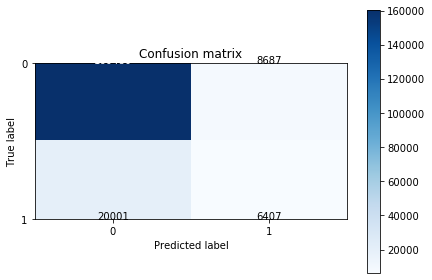

In [149]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
print(knn_model.fit(X_train, y_train))
knn_y_pred = knn_model.predict(X_test)
print(classification_report(y_test, knn_y_pred))
confusion_matrix(y_test, knn_y_pred)

# 5 Apply PCA, SelectKBest and RFE for feature selections

## 5.1 PCA for Logistic Regression

In [157]:
from sklearn import preprocessing

# Split
# X = X_OneHotMinMax.copy()
# #Standardize the data before feeding it to PCA algorithm
# scaler = preprocessing.StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

#Use PCA algorithm to reduce the number of features to speed up training 
pca = PCA(n_components=30)
pca.fit(X_OneHotMinMax)

# Use PCA to transform data 
X_pca  = pca.transform(X_OneHotMinMax)
pca.explained_variance_ratio_.cumsum()

array([0.06, 0.12, 0.17, 0.23, 0.28, 0.31, 0.35, 0.38, 0.41, 0.45, 0.48,
       0.51, 0.54, 0.57, 0.6 , 0.63, 0.64, 0.65, 0.66, 0.68, 0.69, 0.7 ,
       0.72, 0.73, 0.74, 0.75, 0.77, 0.78, 0.79, 0.8 ])

In [158]:
# Train, test, split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y, test_size = .20, random_state= 10)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.86      1.00      0.93    169167
           1       0.00      0.00      0.00     26408

    accuracy                           0.86    195575
   macro avg       0.43      0.50      0.46    195575
weighted avg       0.75      0.86      0.80    195575



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


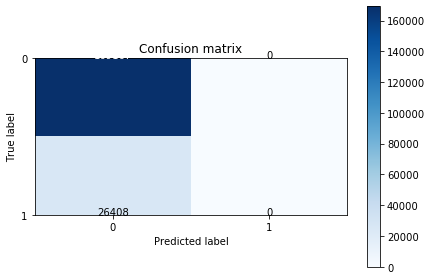

In [161]:
lg_pca_model = LogisticRegression()
print(lg_pca_model.fit(X_train_pca, y_train_pca))
lg_pca_y_pred = lg_pca_model.predict(X_test_pca)
print(classification_report(y_test_pca, lg_pca_y_pred))
confusion_matrix(y_test_pca, lg_pca_y_pred)

threshold 0.1
Recall metric in the testing dataset:  0.7863526204180551
Total confusion matrix 0,1 1,0 79353
threshold 0.2
Recall metric in the testing dataset:  0.46220842169039683
Total confusion matrix 0,1 1,0 37058
threshold 0.3
Recall metric in the testing dataset:  0.2874507724931839
Total confusion matrix 0,1 1,0 27237
threshold 0.4
Recall metric in the testing dataset:  0.19308542865798242
Total confusion matrix 0,1 1,0 24696
threshold 0.5
Recall metric in the testing dataset:  0.13545137837019086
Total confusion matrix 0,1 1,0 24355
threshold 0.6
Recall metric in the testing dataset:  0.09803847318994244
Total confusion matrix 0,1 1,0 24480
threshold 0.7
Recall metric in the testing dataset:  0.06997879430475613
Total confusion matrix 0,1 1,0 24852
threshold 0.8
Recall metric in the testing dataset:  0.047712814298697365
Total confusion matrix 0,1 1,0 25258
threshold 0.9
Recall metric in the testing dataset:  0.0273401999394123
Total confusion matrix 0,1 1,0 25702


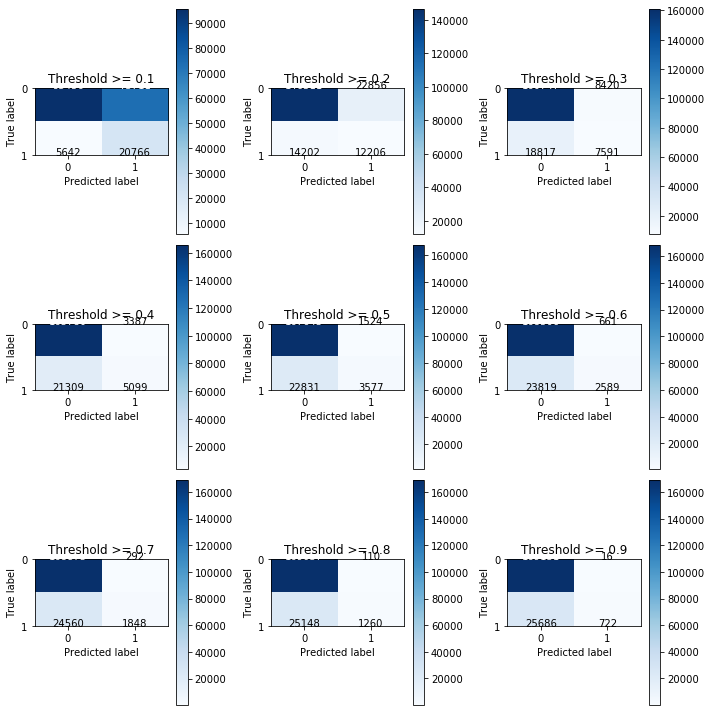

In [162]:

lg_pca_y_pred_undersample_proba = lg_pca_model.predict_proba(X_test_pca)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test_pca,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    print("threshold", i)
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    print("Total confusion matrix 0,1 1,0", cnf_matrix[0,1] + cnf_matrix[1,0])
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.88      0.98      0.93    169167
           1       0.58      0.17      0.26     26408

    accuracy                           0.87    195575
   macro avg       0.73      0.57      0.60    195575
weighted avg       0.84      0.87      0.84    195575



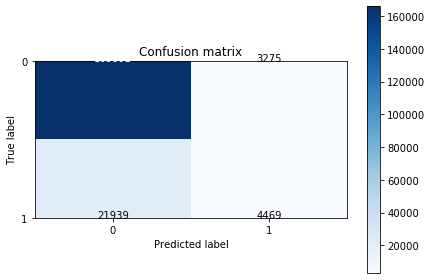

In [152]:
clf = GaussianNB()
print(clf.fit(X_train_pca, y_train_pca))
GaussianNB(priors=None, var_smoothing=1e-09)
nb_pca_y_pred = clf.predict(X_test_pca)
print(classification_report(y_test_pca, nb_pca_y_pred))
confusion_matrix(y_test_pca, nb_pca_y_pred)

## Coclusion for apply PCA

Apply PCA not give us better result. Base on analyze above results are worst than does not apply PCA. 

Reason: Apply PCA will lost some data. It good for apply PCA in Linear Regression because we can avoid correlation. But in classification problem, PCA does not help.

## 5.2 Apply SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Split
X = data.copy()
X.drop(columns=['LateArr'], inplace= True)
Y = data['LateArr']
#Standardize the data before feeding it to PCA algorithm
scaler = preprocessing.StandardScaler()
scaler.fit(X )
X = scaler.transform(X)

X = SelectKBest(f_classif, k=20).fit_transform(X, Y)
X.shape

## Naive bayes

In [ ]:
# Naive bayes
clf = GaussianNB()
clf.fit(X_train, y_train)
GaussianNB(priors=None, var_smoothing=1e-09)
y_pred = clf.predict(X_test)
print('accuracy score',  metrics.accuracy_score(y_test, y_pred))
print('Precision score', metrics.precision_score(y_test, y_pred))
print('recall score', naive_bayes_recall)

In [ ]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,rf_y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('accuracy score',  metrics.accuracy_score(y_test, y_pred))
print('Precision score', metrics.precision_score(y_test, y_pred))
print('recall score', metrics.recall_score(y_test, y_pred))

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [ ]:
## Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=10, max_depth=2,
                             random_state=0)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

print('accuracy score',  metrics.accuracy_score(y_test, rf_y_pred))
print('Precision score', metrics.precision_score(y_test, rf_y_pred))
print('recall score', metrics.recall_score(y_test, rf_y_pred))

In [ ]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,rf_y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

## Gradient Boosting

In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

print('accuracy score',  metrics.accuracy_score(y_test, rf_y_pred))
print('Precision score', metrics.precision_score(y_test, rf_y_pred))
print('recall score', metrics.recall_score(y_test, rf_y_pred))

In [ ]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,rf_y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

## Conclusion for SelectKBest

Apply SelectKBest not give us better result. Base on analyze above results are worst than does not apply SelectKBest. 


# 6 Using gridsearchCV to obtain best parameters for models.

## Logistic Regression

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.01,0.1,1,10,100],
            'solver': ['lbfgs', 'liblinear']}
lg_grid = GridSearchCV(estimator=LogisticRegression(), param_grid = param_grid,scoring="f1", cv=3,n_jobs = -1)
tick = time.time()
lg_grid.fit(X_train_lg, y_train_lg) 
tock = time.time()
lg_grid_best = lg_grid.best_estimator_


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [163]:
print("Best Model Parameter for Logistic Regression: ", lg_grid.best_params_)

Best Model Parameter for Logistic Regression:  {'C': 100, 'solver': 'lbfgs'}


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    169167
           1       0.70      0.13      0.22     26408

    accuracy                           0.88    195575
   macro avg       0.79      0.56      0.58    195575
weighted avg       0.86      0.88      0.84    195575



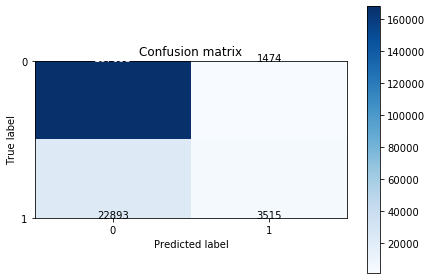

In [171]:
print(lg_grid_best.fit(X_train_lg, y_train_lg))
lg_grid_y_pred = lg_grid_best.predict(X_test_lg)
print(classification_report(y_test, lg_y_pred))
confusion_matrix(y_test, lg_y_pred)

## Changing threshold

threshold 0.1
Recall metric in the testing dataset:  0.7863526204180551
Total confusion matrix 0,1 1,0 79353
threshold 0.2
Recall metric in the testing dataset:  0.46220842169039683
Total confusion matrix 0,1 1,0 37058
threshold 0.3
Recall metric in the testing dataset:  0.2874507724931839
Total confusion matrix 0,1 1,0 27237
threshold 0.4
Recall metric in the testing dataset:  0.19308542865798242
Total confusion matrix 0,1 1,0 24696
threshold 0.5
Recall metric in the testing dataset:  0.13545137837019086
Total confusion matrix 0,1 1,0 24355
threshold 0.6
Recall metric in the testing dataset:  0.09803847318994244
Total confusion matrix 0,1 1,0 24480
threshold 0.7
Recall metric in the testing dataset:  0.06997879430475613
Total confusion matrix 0,1 1,0 24852
threshold 0.8
Recall metric in the testing dataset:  0.047712814298697365
Total confusion matrix 0,1 1,0 25258
threshold 0.9
Recall metric in the testing dataset:  0.0273401999394123
Total confusion matrix 0,1 1,0 25702


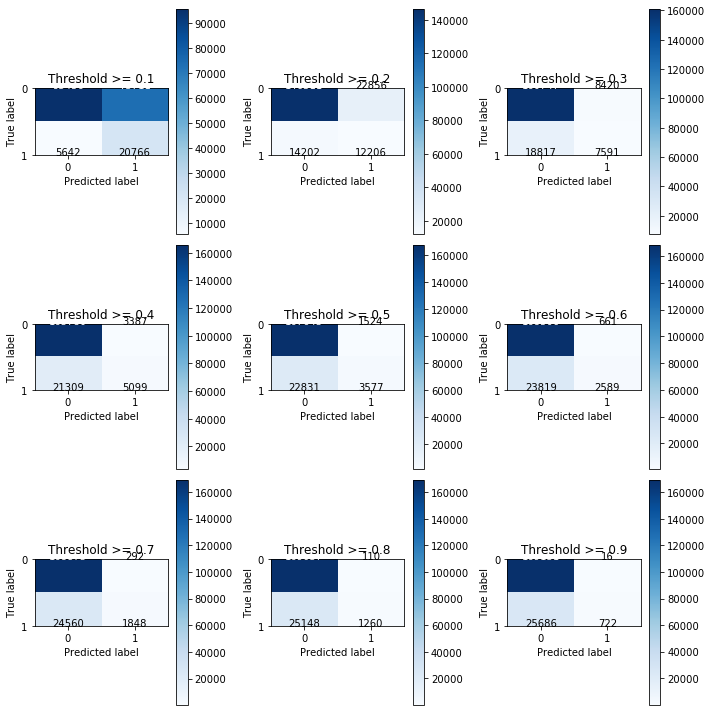

In [74]:
# lg = LogisticRegression()
lg_grid_best.fit(X_train_lg,y_train_lg)
# probs_y is a 2-D array of probability of being labeled as 0 (first column of  array) vs 1 (2nd column in array) 
y_pred_undersample_proba = lg_grid_best.predict_proba(X_test_lg)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test_lg,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    print("threshold", i)
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    print("Total confusion matrix 0,1 1,0", cnf_matrix[0,1] + cnf_matrix[1,0])
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

Base on above graphs, threshold = 0.5 give best result 

## Naive Bayes 

In [82]:
param_grid = {'var_smoothing' :[0.00000000001,0.00000000003,0.0000000001,0.0000000003, 0.000000001,0.000000003,0.00000001]}
nb_grid = GridSearchCV(estimator=GaussianNB(), param_grid = param_grid, scoring="f1", cv=3,n_jobs = -1)
nb_grid.fit(X_train, y_train)
nb_grid_best = nb_grid.best_estimator_ #best estimator
print("Best Parameter for Naive Bayes: ",nb_grid.best_params_)

Best Parameter for Naive Bayes:  {'var_smoothing': 1e-11}


GaussianNB(priors=None, var_smoothing=1e-11)
              precision    recall  f1-score   support

           0       0.89      0.95      0.92    169167
           1       0.42      0.24      0.31     26408

    accuracy                           0.85    195575
   macro avg       0.65      0.60      0.61    195575
weighted avg       0.83      0.85      0.83    195575



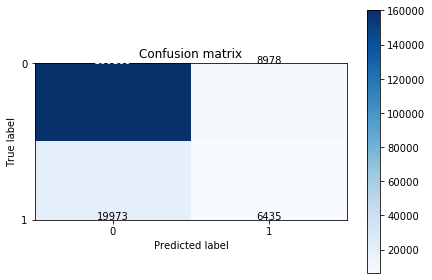

In [83]:
print(nb_grid_best.fit(X_train, y_train))
nb_grid_y_pred = nb_grid_best.predict(X_test)
print(classification_report(y_test, nb_grid_y_pred))
confusion_matrix(y_test_lg, nb_grid_y_pred)

## Decision Tree

In [84]:
param_grid = {'criterion' :['gini', 'entropy'], 'max_features': ['auto', 'log2'], 'max_depth' : [4,7,10]}
dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid = param_grid, scoring="f1",cv=3,n_jobs = -1)
dt_grid.fit(X_train, y_train)
dt_grid_best = dt_grid.best_estimator_ #best estimator
print("Best parameter for decision tree", dt_grid.best_estimator_)

Best parameter for decision tree DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    169167
           1       0.67      0.13      0.21     26408

    accuracy                           0.87    195575
   macro avg       0.77      0.56      0.57    195575
weighted avg       0.85      0.87      0.83    195575



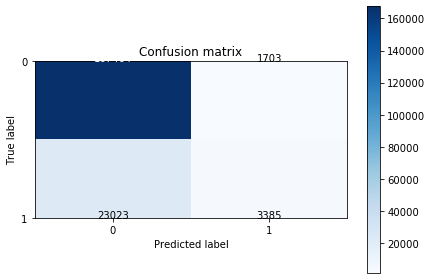

In [85]:
print(dt_grid_best.fit(X_train, y_train))
dt_grid_y_pred = dt_grid_best.predict(X_test)
print(classification_report(y_test, dt_grid_y_pred))
confusion_matrix(y_test, dt_grid_y_pred)

## Random forest

In [87]:
param_grid = {'n_estimators': [10,50,80], 'criterion' :['gini', 'entropy'], 'max_features': ['auto', 'log2'], 'max_depth' : [4,7,10]}
rdf_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid = param_grid, scoring="f1",cv=3,n_jobs = -1)
rdf_grid.fit(X_train, y_train)
rdf_grid_best = rdf_grid.best_estimator_ #best estimator


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    169167
           1       0.78      0.14      0.24     26408

    accuracy                           0.88    195575
   macro avg       0.83      0.57      0.58    195575
weighted avg       0.87      0.88      0.84    195575



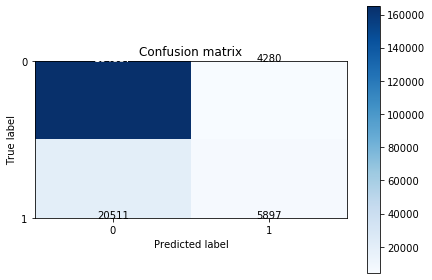

In [88]:
print(rdf_grid_best.fit(X_train, y_train))
rf_gird_y_pred = rdf_grid_best.predict(X_test)
print(classification_report(y_test, rf_gird_y_pred))
confusion_matrix(y_test,rf_y_pred)

## Gradient Boosting

In [177]:
param_grid = {'n_estimators': [10,20,30], 'learning_rate': [0.01,0.03,0.1], 'max_features': ['auto', 'log2'], 'max_depth' : [3,4,5]}
GBC_grid = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid = param_grid, scoring="f1",cv=3,n_jobs = -1)
GBC_grid.fit(X_train, y_train)
GBC_grid_best = GBC_grid.best_estimator_ #best estimator


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    169167
           1       0.79      0.13      0.23     26408

    accuracy                           0.88    195575
   macro avg       0.84      0.56      0.58    195575
weighted avg       0.87      0.88      0.84    1955

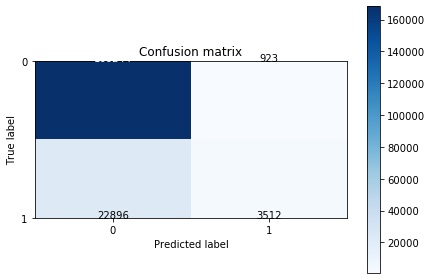

In [178]:
print(GBC_grid_best.fit(X_train, y_train))
gb_gird_y_pred = GBC_grid_best.predict(X_test)
print(classification_report(y_test, gb_gird_y_pred))
confusion_matrix(y_test,gb_gird_y_pred)

## KNN

In [ ]:
param_grid = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights' :['uniform', 'distance'], 'leaf_size': [30,40,50], n_neighbors: [3,5,7,9]}
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = param_grid, scoring="f1",cv=3,n_jobs = -1)
knn_grid.fit(X_train, y_train)
knn_grid_best = knn_grid.best_estimator_ #best estimator
print("Best parameter for KNN", knn_grid_best)

In [ ]:

print(knn_grid_best.fit(X_train, y_train))
knn_grid_y_pred = knn_grid_best.predict(X_test)
print(classification_report(y_test, knn_grid_y_pred))
confusion_matrix(y_test, knn_grid_y_pred)

# Conclusion

In [166]:
def confusion_matrix_conclusion(y_test, y_pred, title = 'Confusion matrix'):
    cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title=title)


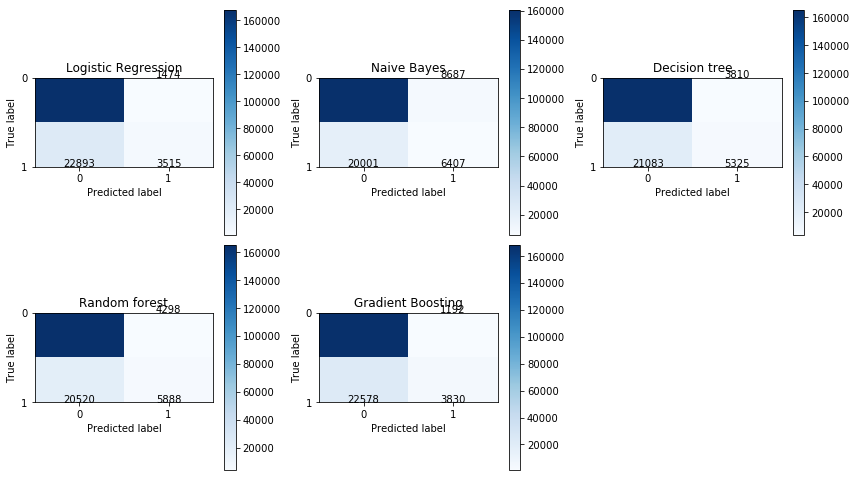

In [169]:

plt.figure(figsize=(12,10))
j = 1

# plt.subplot(3,3,j)
# j += 1
# confusion_matrix(y_test, knn_grid_y_pred, 'KNN Grid')

plt.subplot(3,3,j)
j += 1
confusion_matrix_conclusion(y_test_lg, lg_y_pred, 'Logistic Regression')

plt.subplot(3,3,j)
j += 1
confusion_matrix_conclusion(y_test, knn_y_pred, 'Naive Bayes')

plt.subplot(3,3,j)
j += 1
confusion_matrix_conclusion(y_test, dt_y_pred, 'Decision tree')

plt.subplot(3,3,j)
j += 1
confusion_matrix_conclusion(y_test, rf_y_pred, 'Random forest')

plt.subplot(3,3,j)
j += 1
confusion_matrix_conclusion(y_test, gb_y_pred, 'Gradient Boosting')


Decision tree give better result than Naive Bayes
Random forest give better result than Decision tree
Gradient Boosting give best result


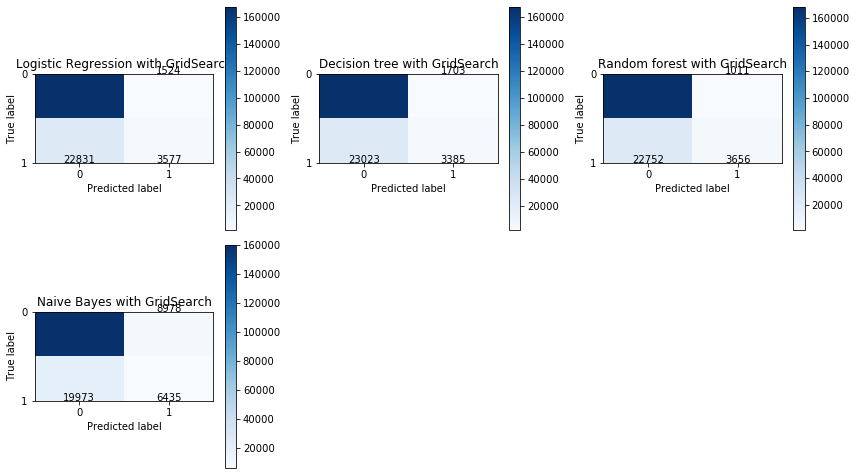

In [176]:
plt.figure(figsize=(12,10))
j=1
plt.subplot(3,3,j)
j += 1
confusion_matrix_conclusion(y_test_lg, lg_grid_y_pred, 'Logistic Regression with GridSearch')

# plt.subplot(3,3,j)
# j += 1
# confusion_matrix_conclusion(y_test, knn_y_pred, 'Naive Bayes with GridSearch')

plt.subplot(3,3,j)
j += 1
confusion_matrix_conclusion(y_test, dt_grid_y_pred, 'Decision tree with GridSearch')

plt.subplot(3,3,j)
j += 1
confusion_matrix_conclusion(y_test, rf_gird_y_pred, 'Random forest with GridSearch')

plt.subplot(3,3,j)
j += 1
confusion_matrix_conclusion(y_test, nb_grid_y_pred, 'Naive Bayes with GridSearch')

# Reference

## Imbalance: 
dữ liệu ko cân bằng, sl số 1 và 0 là rất khác nhau ( giả sử 0 rất nhiều 90%)
Model mình ko làm gì cả và phán tất cả là 0 

P = 0.9
R = 0 (recall)
=> F(0) = 0 ko học dc gì
### Cách 1: Tìm thuật toán robust with imbalance: decision tree , naive bayes, knn 

### Cách 2: Điều chỉnh threshold
Logistic regression:
>0.5 coi như 1, < 0.5 coi như 0 
predict_proba() -> xác suất là số 1, 0

Điều chỉnh threshold của model 0.3

### Cách 3: Điều chỉnh cost function 
cost = y*log(1-y) + (1-y)log(1-y)
ylog(1-y) : là số 1
(1-y)log(1-y) : là số 0
Để thay đổi cost mình nhân thêm tham số alpha
cost = alpha*y*log(1-y) + (1-alpha)(1-y)log(1-y)
Tức là nếu dự đoán sai số 1, thì cost lớn hơn nhiều so với dự đoán sai số 0


### Cách 4: resampling
Chọn radom 10 làn trong data số 0
- up sample 
- down sample 

Logistic regression

Logistic regression: số thực 
Naive bayes, decision tree: category 


Gaussian
Multinomial: category nhiều hơn 2
Complement
Bernoulli: phân loại 0,1
        